In [12]:
import pandas as pd

In [14]:
data = pd.read_pickle('sample_final.pkl')

In [22]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


In [104]:
data.head(-1)

,event_time,product_id,category_id,category_code,brand,price,user_id,day,week,month,year,cart,purchase,view
12454390,2019-12-29 19:59:04+00:00,3700245,2232732101063475749,appliances.environment.vacuum,philips,102.94,519178677,6,5,1970-01-01 00:00:00.000000012,1,0,0,1
3366639,2019-10-30 21:23:49+00:00,1800944,2053013554415534427,electronics.video.tv,sony,558.58,546825052,2,4,1970-01-01 00:00:00.000000010,1,0,0,1
2894803,2019-12-07 14:45:57+00:00,8800843,2053013560530830019,electronics.camera.video,inoi,10.37,582885516,5,2,1970-01-01 00:00:00.000000012,1,0,0,1
8817206,2020-04-16 04:18:35+00:00,1801906,2232732099754852875,appliances.personal.massager,tcl,267.70,512477139,3,2,1970-01-01 00:00:00.000000004,2,0,0,1
6792514,2020-02-01 15:08:23+00:00,1005100,2232732093077520756,construction.tools.light,samsung,140.28,512493561,5,0,1970-01-01 00:00:00.000000002,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366667,2020-04-22 07:30:03+00:00,29501819,2232732116498514828,apparel.jeans,nutrex,20.46,551722474,2,3,1970-01-01 00:00:00.000000004,2,0,0,1
7724461,2020-01-31 10:00:20+00:00,1004767,2232732093077520756,construction.tools.light,samsung,226.18,578855723,4,4,1970-01-01 00:00:00.000000001,2,0,0,1
3065075,2020-01-26 15:00:33+00:00,19100395,2232732093345956218,construction.tools.light,metabo,577.23,533920347,6,3,1970-01-01 00:00:00.000000001,2,0,0,1
1043621,2020-01-21 00:07:03+00:00,1005100,2232732093077520756,construction.tools.light,samsung,141.06,516254529,1,3,1970-01-01 00:00:00.000000001,2,0,0,1


In [24]:
X = data[['price', 'day', 'month']]
y = data['purchase']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

   month  purchase
0      1      1538
1      2      2062
2      3       696
3      4      1602
4     10      1145
5     11      1401
6     12      2188
                            OLS Regression Results                            
Dep. Variable:               purchase   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.178
Method:                 Least Squares   F-statistic:                   0.09502
Date:                Mon, 03 Jun 2024   Prob (F-statistic):              0.770
Time:                        15:29:27   Log-Likelihood:                -53.013
No. Observations:                   7   AIC:                             110.0
Df Residuals:                       5   BIC:                             109.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|    

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


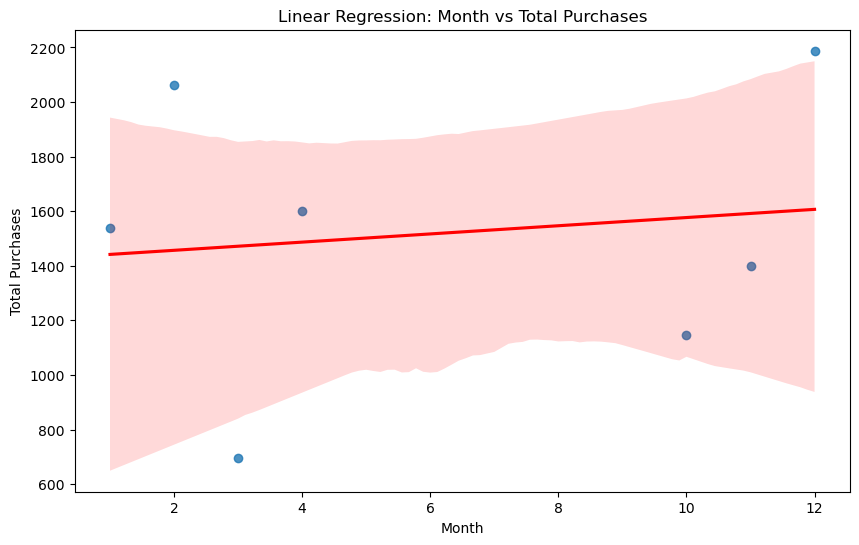

In [36]:
monthly_purchases = data.groupby('month')['purchase'].sum().reset_index()

# Check the aggregated data
print(monthly_purchases)

# Prepare data for regression
X = monthly_purchases[['month']]
y = monthly_purchases['purchase']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Plotting regression results for 'month' vs total 'purchases'
plt.figure(figsize=(10, 6))
sns.regplot(x='month', y='purchase', data=monthly_purchases, line_kws={"color": "red"})
plt.title('Linear Regression: Month vs Total Purchases')
plt.xlabel('Month')
plt.ylabel('Total Purchases')
plt.show()

   day  purchase
0    0      1529
1    1      1477
2    2      1469
3    3      1418
4    4      1509
5    5      1482
6    6      1748
                            OLS Regression Results                            
Dep. Variable:               purchase   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     1.763
Date:                Mon, 03 Jun 2024   Prob (F-statistic):              0.242
Time:                        15:30:44   Log-Likelihood:                -41.034
No. Observations:                   7   AIC:                             86.07
Df Residuals:                       5   BIC:                             85.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


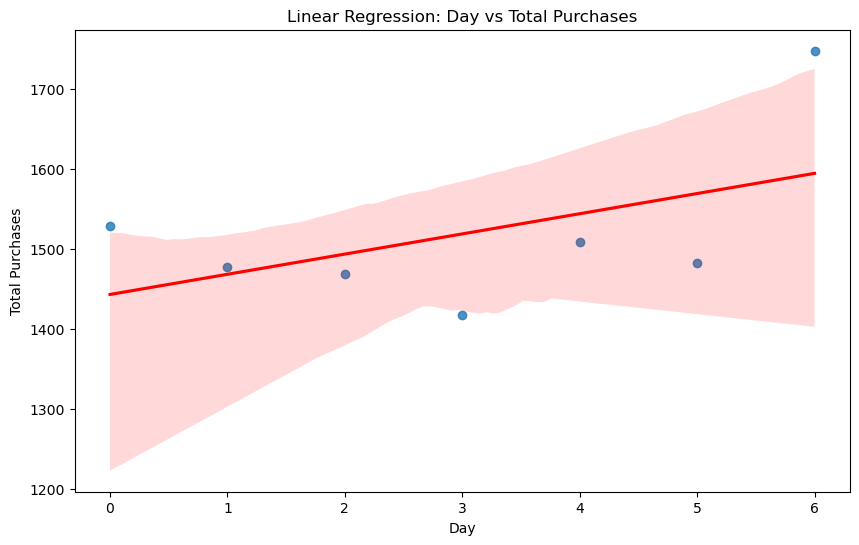

In [38]:
daily_purchases = data.groupby('day')['purchase'].sum().reset_index()

# Check the aggregated data
print(daily_purchases)

# Prepare data for regression
X = daily_purchases[['day']]
y = daily_purchases['purchase']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Plotting regression results for 'day' vs total 'purchases'
plt.figure(figsize=(10, 6))
sns.regplot(x='day', y='purchase', data=daily_purchases, line_kws={"color": "red"})
plt.title('Linear Regression: Day vs Total Purchases')
plt.xlabel('Day')
plt.ylabel('Total Purchases')
plt.show()

In [20]:
first_row = data.head(1)
print(first_row)

                        event_time  product_id          category_id  \
12454390 2019-12-29 19:59:04+00:00     3700245  2232732101063475749   

                          category_code    brand   price    user_id  day  \
12454390  appliances.environment.vacuum  philips  102.94  519178677    6   

          week  month  year  cart  purchase  view  
12454390     5     12     1     0         0     1  


                            OLS Regression Results                            
Dep. Variable:               purchase   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7673
Date:                Wed, 05 Jun 2024   Prob (F-statistic):              0.383
Time:                        15:40:43   Log-Likelihood:                -1016.5
No. Observations:                 139   AIC:                             2037.
Df Residuals:                     137   BIC:                             2043.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            28.4628     61.664      0.462

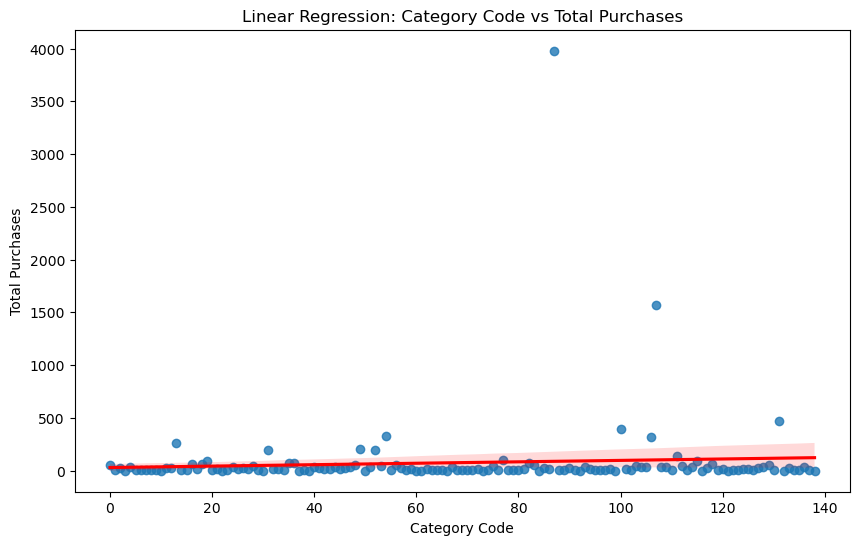

In [52]:
# Aggregate data by category_code to sum the number of purchases
category_purchases = data.groupby('category_code')['purchase'].sum().reset_index()

# Convert category_code to numeric if necessary (assuming it's a categorical variable)
category_purchases['category_code'] = category_purchases['category_code'].astype('category').cat.codes

# Prepare data for regression
X = category_purchases[['category_code']]
y = category_purchases['purchase']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Plotting regression results for 'category_code' vs total 'purchases'
plt.figure(figsize=(10, 6))
sns.regplot(x='category_code', y='purchase', data=category_purchases, line_kws={"color": "red"})
plt.title('Linear Regression: Category Code vs Total Purchases')
plt.xlabel('Category Code')
plt.ylabel('Total Purchases')
plt.show()

                            OLS Regression Results                            
Dep. Variable:               purchase   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7673
Date:                Wed, 05 Jun 2024   Prob (F-statistic):              0.383
Time:                        15:44:40   Log-Likelihood:                -1016.5
No. Observations:                 139   AIC:                             2037.
Df Residuals:                     137   BIC:                             2043.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            28.4628     61.664      0.462

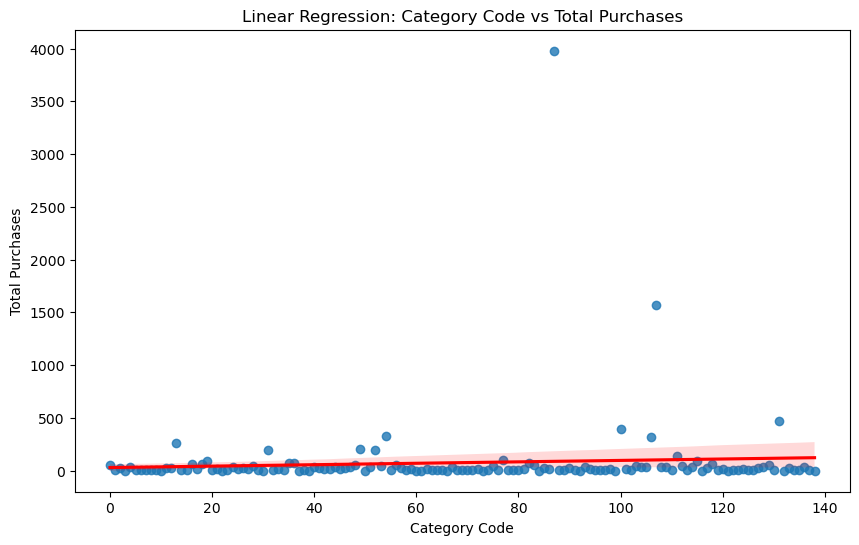

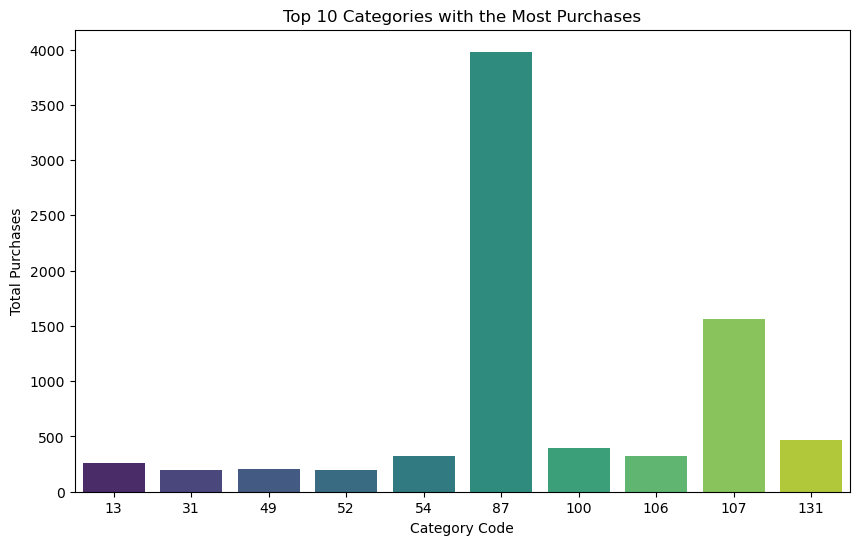

In [54]:
category_purchases = data.groupby('category_code')['purchase'].sum().reset_index()

# Convert category_code to numeric if necessary (assuming it's a categorical variable)
category_purchases['category_code'] = category_purchases['category_code'].astype('category').cat.codes

# Prepare data for regression
X = category_purchases[['category_code']]
y = category_purchases['purchase']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Identify the top 10 categories with the most purchases
top_10_categories = category_purchases.sort_values(by='purchase', ascending=False).head(10)

print("Top 10 Categories with the Most Purchases:")
print(top_10_categories)

# Plotting regression results for 'category_code' vs total 'purchases'
plt.figure(figsize=(10, 6))
sns.regplot(x='category_code', y='purchase', data=category_purchases, line_kws={"color": "red"})
plt.title('Linear Regression: Category Code vs Total Purchases')
plt.xlabel('Category Code')
plt.ylabel('Total Purchases')
plt.show()

# Plotting top 10 categories
plt.figure(figsize=(10, 6))
sns.barplot(x='category_code', y='purchase', data=top_10_categories, palette="viridis")
plt.title('Top 10 Categories with the Most Purchases')
plt.xlabel('Category Code')
plt.ylabel('Total Purchases')
plt.show()

Top 10 Categories with the Most Purchases:
                        category_code  purchase
87           construction.tools.light      3980
107            electronics.smartphone      1566
131                     sport.bicycle       470
100       electronics.audio.headphone       392
54       appliances.personal.massager       326
106                electronics.clocks       322
13                      apparel.shoes       260
49   appliances.kitchen.refrigerators       206
52          appliances.kitchen.washer       195
31      appliances.environment.vacuum       193


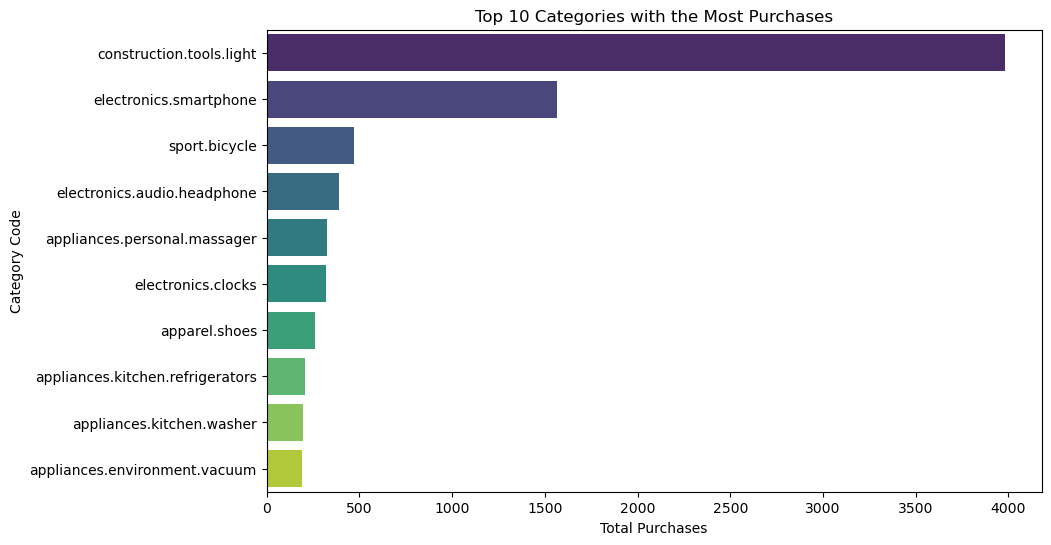

In [62]:
# Aggregate data by category_code to sum the number of purchases
category_purchases = data.groupby('category_code')['purchase'].sum().reset_index()

# Identify the top 10 categories with the most purchases
top_10_categories = category_purchases.sort_values(by='purchase', ascending=False).head(10)

print("Top 10 Categories with the Most Purchases:")
print(top_10_categories)

# Plotting top 10 categories
plt.figure(figsize=(10, 6))
sns.barplot(x='purchase', y='category_code', data=top_10_categories, palette="viridis")
plt.title('Top 10 Categories with the Most Purchases')
plt.xlabel('Total Purchases')
plt.ylabel('Category Code')
plt.show()

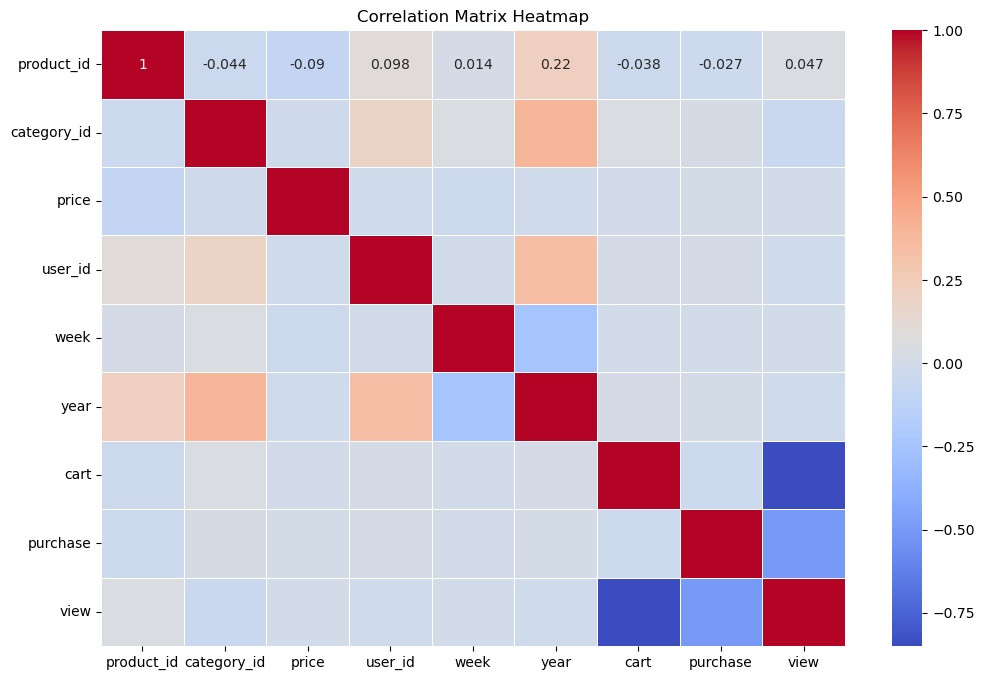

In [76]:
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

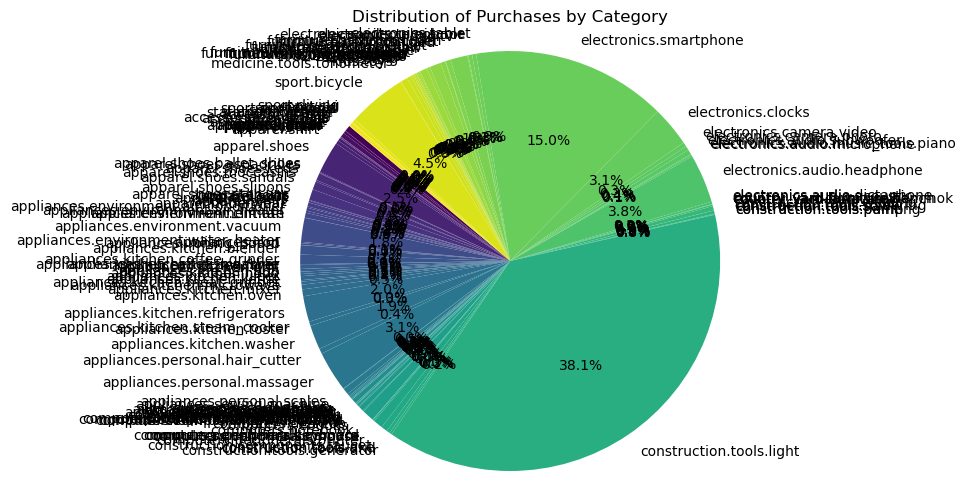

In [80]:
# Aggregate data by category_code to sum the number of purchases
category_purchases = data.groupby('category_code')['purchase'].sum().reset_index()

# Plotting pie chart for purchase distribution by category
plt.figure(figsize=(10, 6))
plt.pie(category_purchases['purchase'], labels=category_purchases['category_code'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(category_purchases)))
plt.title('Distribution of Purchases by Category')
plt.axis('equal')
plt.show()


In [90]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

Top 10 Categories with the Most Purchases:
                        category_code  purchase
87           construction.tools.light      3980
107            electronics.smartphone      1566
131                     sport.bicycle       470
100       electronics.audio.headphone       392
54       appliances.personal.massager       326
106                electronics.clocks       322
13                      apparel.shoes       260
49   appliances.kitchen.refrigerators       206
52          appliances.kitchen.washer       195
31      appliances.environment.vacuum       193
Category Code: construction.tools.light
       brand  purchase
132  samsung      1670
7      apple      1264
168   xiaomi       518

Category Code: electronics.smartphone
      brand  purchase
38  samsung       669
1     apple       532
48   xiaomi       189

Category Code: sport.bicycle
       brand  purchase
11     apple       241
230   xiaomi        80
184  samsung        37

Category Code: electronics.audio.headphone
    

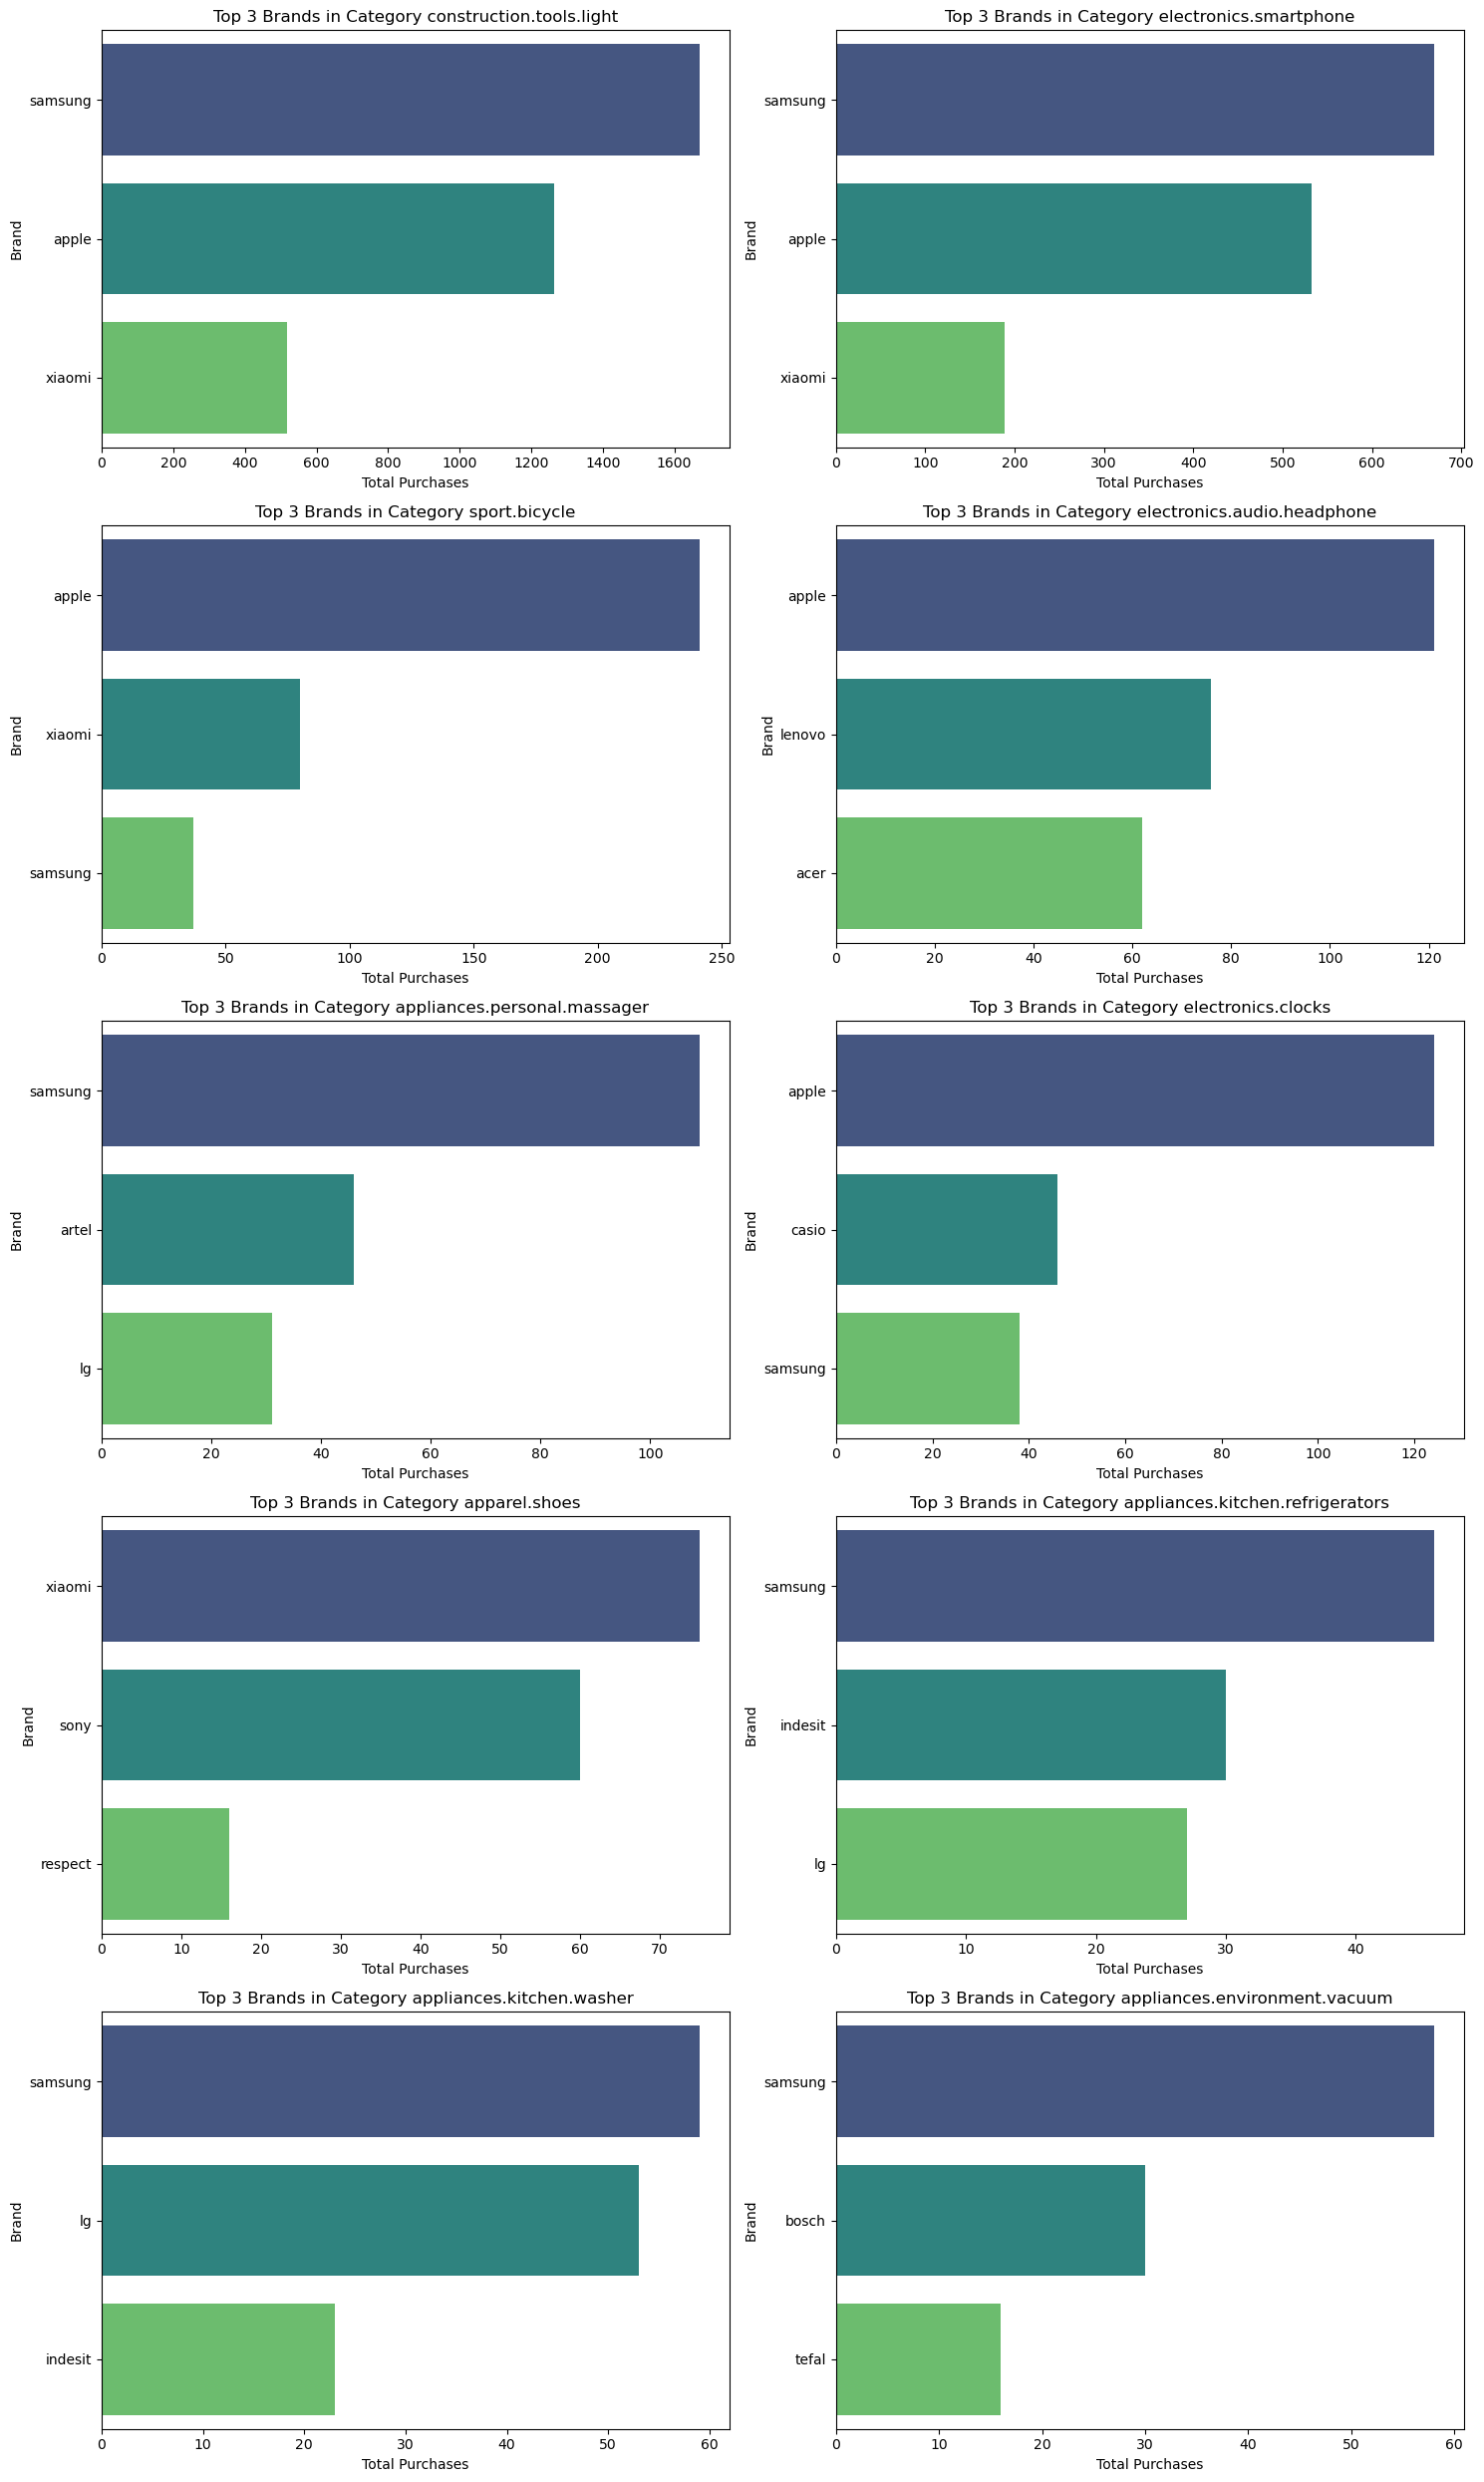

In [106]:
# Aggregate data by category_code to sum the number of purchases
category_purchases = data.groupby('category_code')['purchase'].sum().reset_index()

# Identify the top 10 categories with the most purchases
top_10_categories = category_purchases.sort_values(by='purchase', ascending=False).head(10)

print("Top 10 Categories with the Most Purchases:")
print(top_10_categories)

# Filter the data to include only the top 10 categories
top_10_category_codes = top_10_categories['category_code'].tolist()
filtered_data = data[data['category_code'].isin(top_10_category_codes)]

# Initialize a dictionary to store the top 3 brands for each category
top_brands_per_category = {}

# Loop through each top category and find the top 3 brands
for category_code in top_10_category_codes:
    category_data = filtered_data[filtered_data['category_code'] == category_code]
    brand_purchases = category_data.groupby('brand')['purchase'].sum().reset_index()
    top_3_brands = brand_purchases.sort_values(by='purchase', ascending=False).head(3)
    top_brands_per_category[category_code] = top_3_brands

# Print the results
for category_code, top_brands in top_brands_per_category.items():
    print(f"Category Code: {category_code}")
    print(top_brands)
    print()

# Plotting top 3 brands for each of the top 10 categories
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))
axes = axes.flatten()

for idx, (category_code, top_brands) in enumerate(top_brands_per_category.items()):
    sns.barplot(x='purchase', y='brand', data=top_brands, ax=axes[idx], palette="viridis")
    axes[idx].set_title(f'Top 3 Brands in Category {category_code}')
    axes[idx].set_xlabel('Total Purchases')
    axes[idx].set_ylabel('Brand')

plt.tight_layout()
plt.show()

Most Purchased Product ID: 1004767
Total Purchases: 336
Aggregated daily purchases for the most purchased product:
   day  purchase
0    0        38
1    1        44
2    2        31
3    3        58
4    4        49
5    5        57
6    6        59


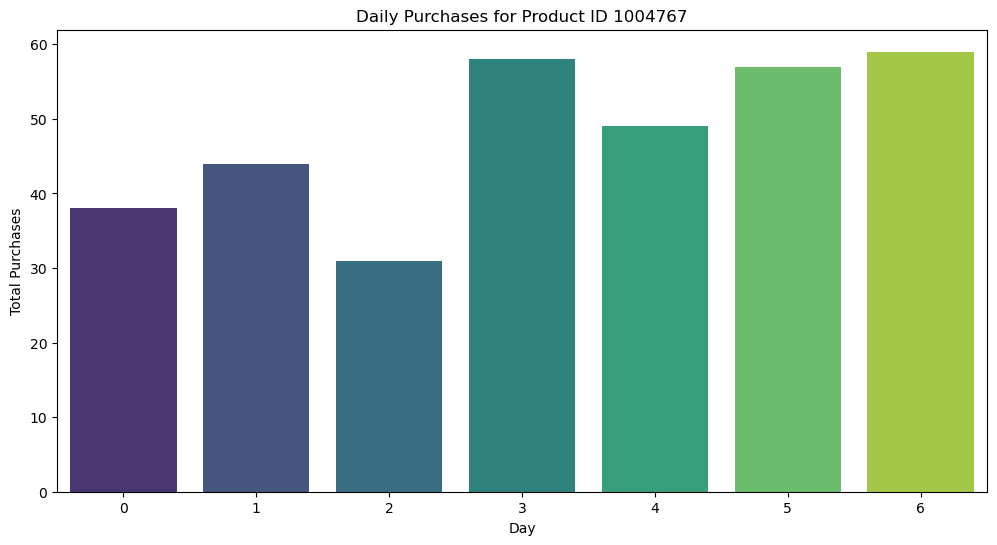

In [108]:
# Aggregate data by product_id to sum the number of purchases
product_purchases = data.groupby('product_id')['purchase'].sum().reset_index()

# Identify the most purchased product
most_purchased_product = product_purchases.sort_values(by='purchase', ascending=False).iloc[0]
most_purchased_product_id = most_purchased_product['product_id']

print(f"Most Purchased Product ID: {most_purchased_product_id}")
print(f"Total Purchases: {most_purchased_product['purchase']}")

# Filter data for the most purchased product
most_purchased_product_data = data[data['product_id'] == most_purchased_product_id]

# Aggregate data by day to sum the number of purchases for the most purchased product
daily_purchases = most_purchased_product_data.groupby('day')['purchase'].sum().reset_index()

# Print the aggregated data
print("Aggregated daily purchases for the most purchased product:")
print(daily_purchases)

# Plotting the daily purchases for the most purchased product
plt.figure(figsize=(12, 6))
sns.barplot(x='day', y='purchase', data=daily_purchases, palette="viridis")
plt.title(f'Daily Purchases for Product ID {most_purchased_product_id}')
plt.xlabel('Day')
plt.ylabel('Total Purchases')
plt.show()

Top 5 Most Purchased Products:
       product_id  purchase
740       1004767       336
1009      1005115       300
814       1004856       270
994       1005100       254
11626     4804056       207


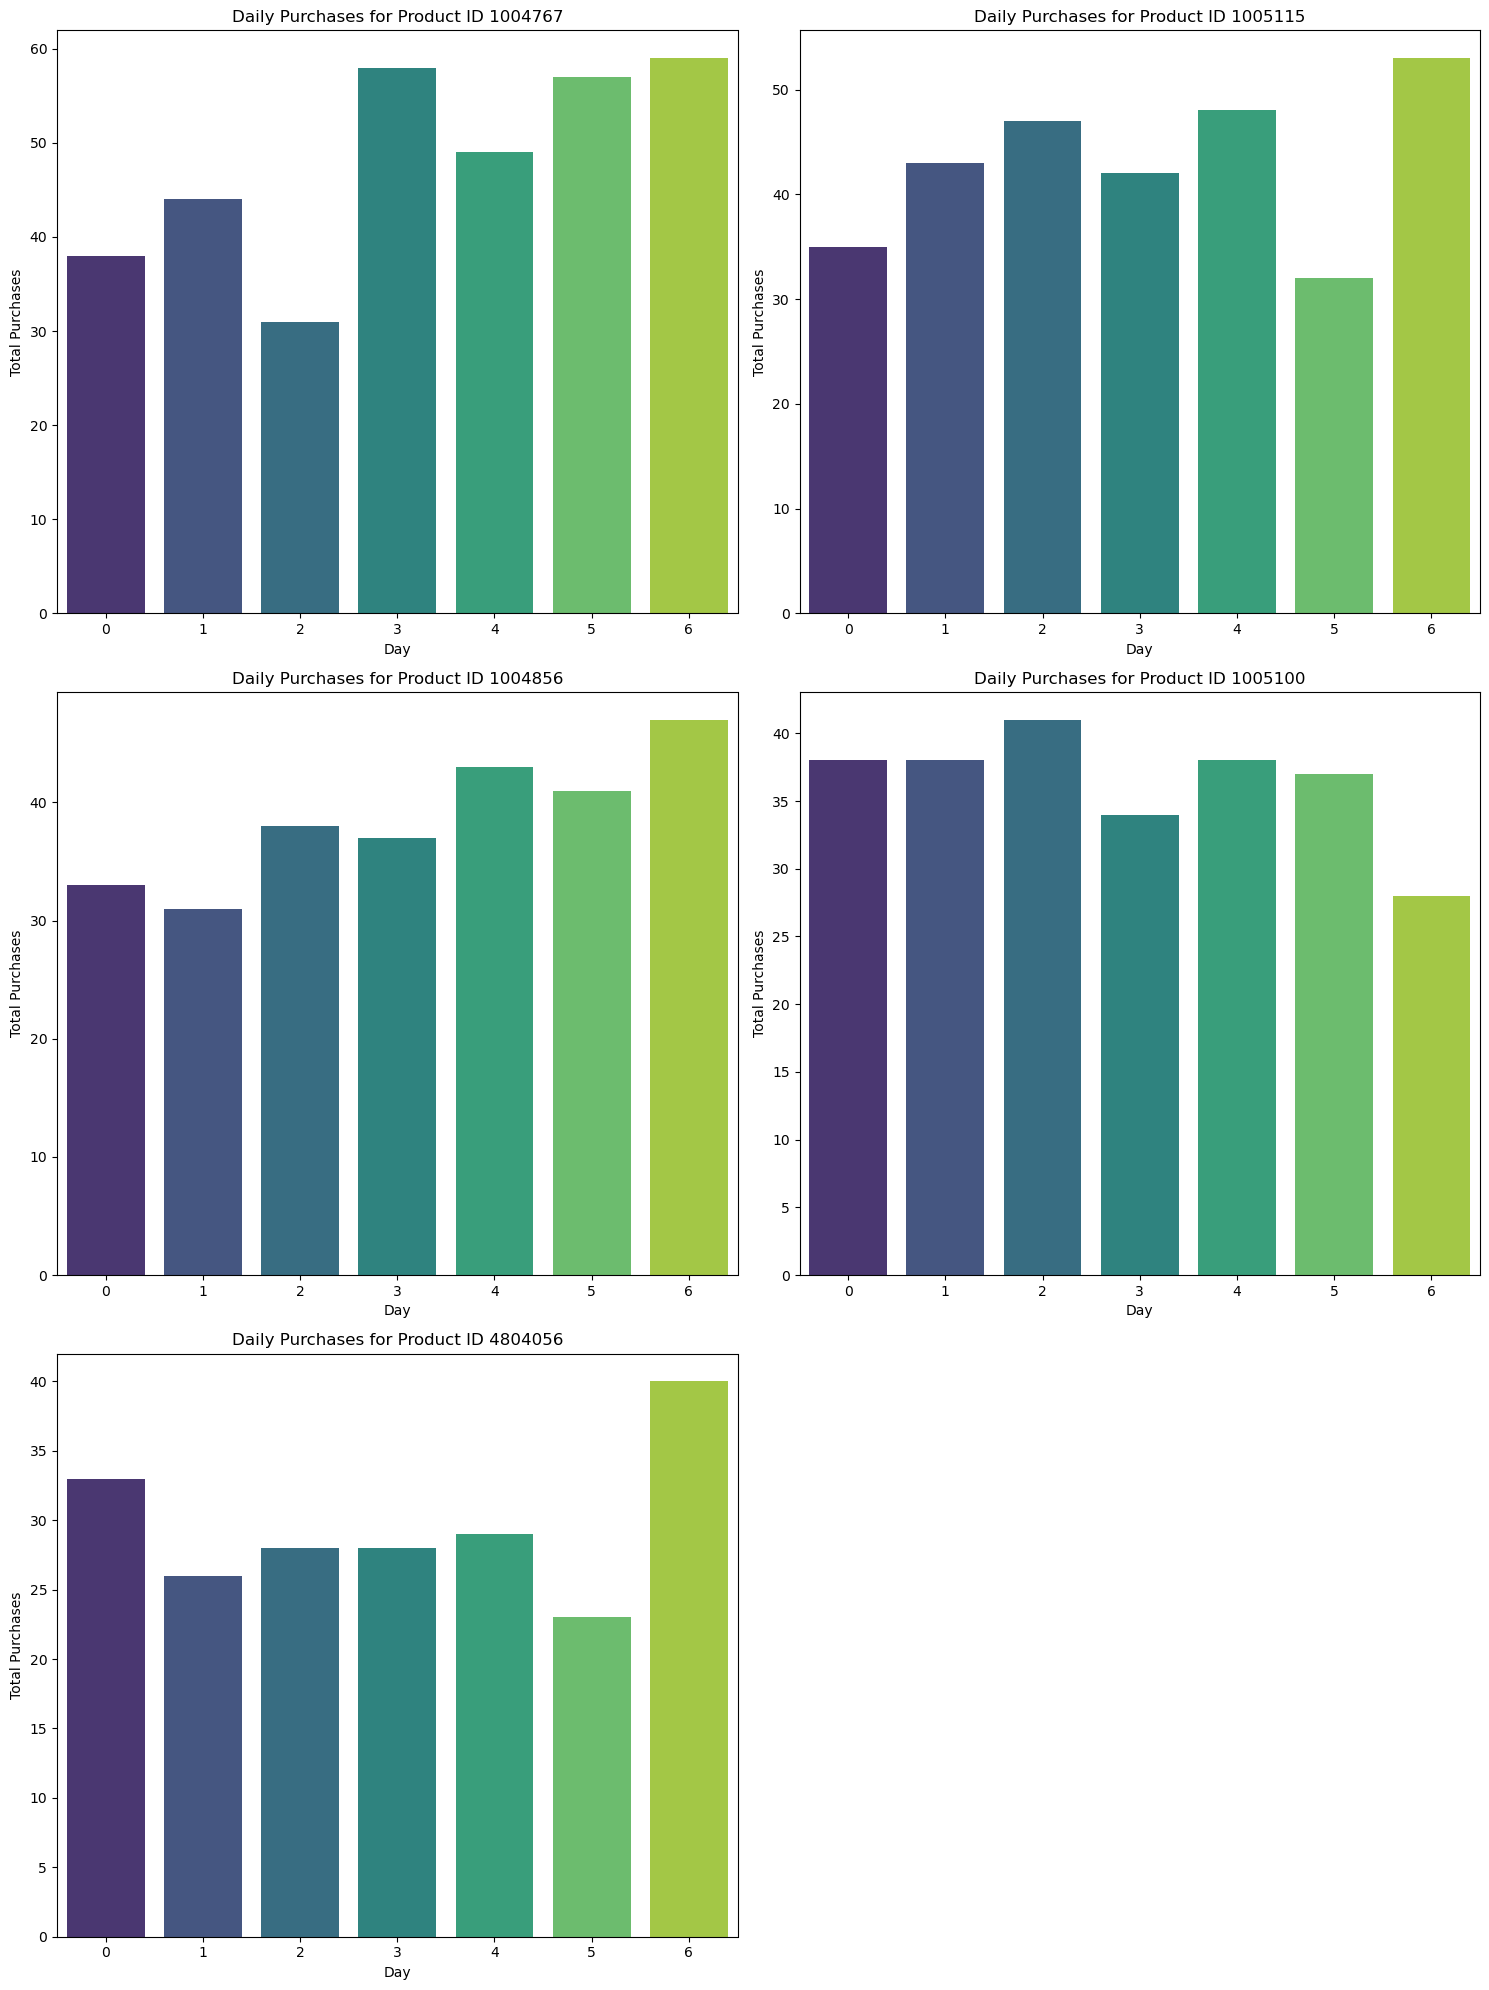

In [110]:
# Aggregate data by product_id to sum the number of purchases
product_purchases = data.groupby('product_id')['purchase'].sum().reset_index()

# Identify the top 5 most purchased products
top_5_products = product_purchases.sort_values(by='purchase', ascending=False).head(5)

print("Top 5 Most Purchased Products:")
print(top_5_products)

# Initialize a dictionary to store daily purchase data for each top product
top_products_daily_purchases = {}

# Loop through each top product and aggregate daily purchases
for product_id in top_5_products['product_id']:
    product_data = data[data['product_id'] == product_id]
    daily_purchases = product_data.groupby('day')['purchase'].sum().reset_index()
    top_products_daily_purchases[product_id] = daily_purchases

# Plotting the daily purchases for the top 5 most purchased products
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for idx, (product_id, daily_purchases) in enumerate(top_products_daily_purchases.items()):
    sns.barplot(x='day', y='purchase', data=daily_purchases, ax=axes[idx], palette="viridis")
    axes[idx].set_title(f'Daily Purchases for Product ID {product_id}')
    axes[idx].set_xlabel('Day')
    axes[idx].set_ylabel('Total Purchases')

# Remove any unused subplots
for j in range(len(top_products_daily_purchases), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [131]:
# Calculate the total number of views and purchases for each product
product_stats = data.groupby('product_id').agg(
    total_views=('view', 'sum'),
    total_purchases=('purchase', 'sum')
).reset_index()

# Calculate the view-to-purchase ratio
product_stats['view_to_purchase_ratio'] = product_stats['total_views'] / (product_stats['total_purchases'] + 1)

# Define a threshold for the view-to-purchase ratio to consider a product as at risk
# For this example, let's consider a product at risk if the ratio is greater than 10
at_risk_products = product_stats[product_stats['view_to_purchase_ratio'] > 10]

# Display the at risk products
at_risk_products

,product_id,total_views,total_purchases,view_to_purchase_ratio
1,1000978,46,0,46.0
5,1001588,27,0,27.0
6,1001605,12,0,12.0
8,1001618,25,0,25.0
12,1002062,13,0,13.0
...,...,...,...,...
78653,100200068,16,0,16.0
78654,100200081,11,0,11.0
78661,100200160,16,0,16.0
78959,100205783,11,0,11.0
